# Feature Engineering: Feature Creation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read in text

In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/NLP/Ch01/01_03/Start/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [4]:
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [7]:
import string

def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)- text.count(" ")), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punc(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

In [19]:
from matplotlib import pyplot 
import numpy as np
%matplotlib inline

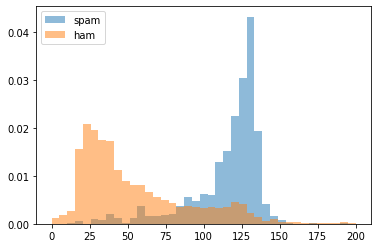

In [25]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, density=True, label='spam',)
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

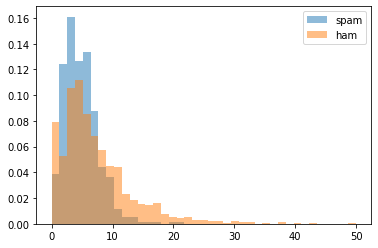

In [27]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# Transformations

## Create the two new features

In [28]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


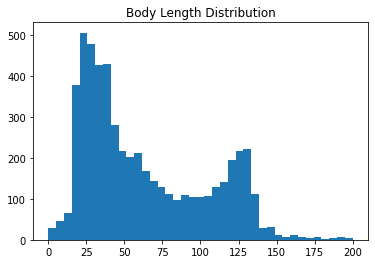

In [29]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

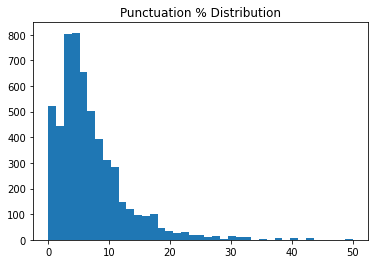

In [30]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

Box-Cox Power Transformation

Process

    Determine what range of exponents to test
    Apply each transformation to each value of your chosen feature
    Use some criteria to determine which of the transformations yield the best distribution


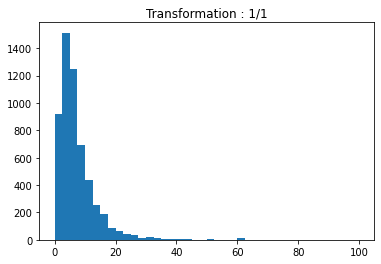

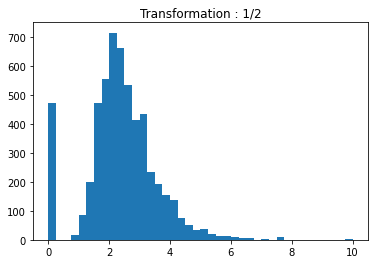

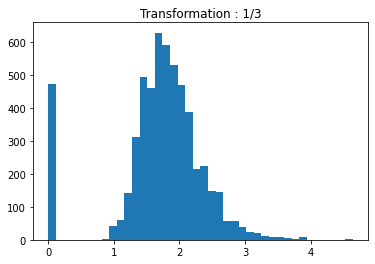

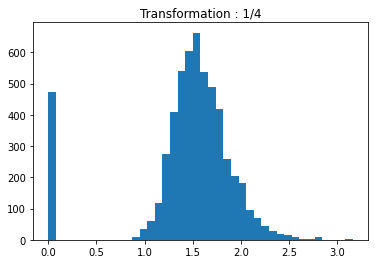

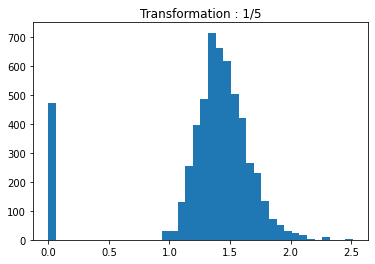

In [31]:
for i in [1,2,3,4,5]:
  pyplot.hist((data['punct%'])**(1/i), bins=40)
  pyplot.title("Transformation : 1/{}".format(str(i)))
  pyplot.show()